In [28]:
import numpy as np
from ccl_str import ccl_str
from pyDOE import lhs
import os
np.random.seed(42) 

# 定义参数范围
A1 = 0.31
BetaStar = 0.09

E_k_Schmidt = 1.0
E_Beta = 0.0828
E_w_Schmidt = 0.856

O_k_Schmidt = 0.85
O_Beta = 0.075
O_w_Schmidt = 0.5

# 定义参数范围
A1_range            = (0.20, 0.90)
BetaStar_range      = (0.04, 0.20)
E_k_Schmidt_range   = (0.30, 1.20)
E_Beta_range        = (0.05, 0.13)
E_w_Schmidt_range   = (0.60, 1.50)
O_k_Schmidt_range   = (0.30, 1.40)
O_Beta_range        = (0.04, 0.40)
O_w_Schmidt_range   = (0.25, 2.00)

#生成100个参数集合
N = 100
lhs_samples = lhs(8, samples=N)

# 将样本映射到指定范围
A1_samples          = A1_range[0]           + (A1_range[1] - A1_range[0])                   * lhs_samples[:, 0]
BetaStar_samples    = BetaStar_range[0]     + (BetaStar_range[1] - BetaStar_range[0])       * lhs_samples[:, 1]
E_k_Schmidt_samples = E_k_Schmidt_range[0]  + (E_k_Schmidt_range[1] - E_k_Schmidt_range[0]) * lhs_samples[:, 2]
E_Beta_samples      = E_Beta_range[0]       + (E_Beta_range[1] - E_Beta_range[0])           * lhs_samples[:, 3]
E_w_Schmidt_samples = E_w_Schmidt_range[0]  + (E_w_Schmidt_range[1] - E_w_Schmidt_range[0]) * lhs_samples[:, 4]
O_k_Schmidt_samples = O_k_Schmidt_range[0]  + (O_k_Schmidt_range[1] - O_k_Schmidt_range[0]) * lhs_samples[:, 5]
O_Beta_samples      = O_Beta_range[0]       + (O_Beta_range[1] - O_Beta_range[0])           * lhs_samples[:, 6]
O_w_Schmidt_samples = O_w_Schmidt_range[0]  + (O_w_Schmidt_range[1] - O_w_Schmidt_range[0]) * lhs_samples[:, 7]

samples = np.vstack((A1_samples, BetaStar_samples, E_k_Schmidt_samples, E_Beta_samples, E_w_Schmidt_samples, O_k_Schmidt_samples, O_Beta_samples, O_w_Schmidt_samples)).T

np.savetxt("./samples.txt", samples, fmt="%.6f", delimiter="\t", header="A1\tBetaStar\tE_k_Schmidt\tE_Beta\tE_w_Schmidt\tO_k_Schmidt\tO_Beta\tO_w_Schmidt", comments='')
samples_data = np.loadtxt("./samples.txt", skiprows=1)

# Ensure the output directory exists
os.makedirs("./ccls", exist_ok=True)

for i in range(N):
    changed_ccl = ccl_str%(samples_data[i, 0], samples_data[i, 1], samples_data[i, 2], samples_data[i, 3], samples_data[i, 4], samples_data[i, 5], samples_data[i, 6], samples_data[i, 7])
    with open(f"./ccls/case-{i}.txt", "w") as f:
        f.write(changed_ccl)
	

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def init_X_f(m, l, N, points_num, samples_data, probes_file):
    A1_samples              = samples_data[:N, 0] 
    BetaStar_samples        = samples_data[:N, 1] 
    E_k_Schmidt_samples     = samples_data[:N, 2] 
    E_Beta_samples          = samples_data[:N, 3]  
    E_w_Schmidt_samples     = samples_data[:N, 4]  
    O_k_Schmidt_samples     = samples_data[:N, 5]  
    O_Beta_samples          = samples_data[:N, 6]  
    O_w_Schmidt_samples     = samples_data[:N, 7]

    X_f = np.zeros((m+l, N))
    t_observed = np.zeros((points_num, N))

    # 统计观测值
    for case_i in range(N):
        df = pd.read_csv(f'./{probes_file}/yita-monitor-points-{case_i:02d}.csv', header=None)  
        t_observed[:, case_i] = df.values.flatten().tolist()

    X_f[0:points_num,   :] = t_observed
    X_f[points_num+0,   :] = A1_samples
    X_f[points_num+1,   :] = BetaStar_samples
    X_f[points_num+2,   :] = E_k_Schmidt_samples
    X_f[points_num+3,   :] = E_Beta_samples
    X_f[points_num+4,   :] = E_w_Schmidt_samples
    X_f[points_num+5,   :] = O_k_Schmidt_samples
    X_f[points_num+6,   :] = O_Beta_samples
    X_f[points_num+7,   :] = O_w_Schmidt_samples
    return X_f

def plot_parameters_only(Xf_history, m):
    l = Xf_history[0].shape[0] - m
    iteration_num = len(Xf_history)
    param_means = np.zeros((l, iteration_num))
    
    for i in range(iteration_num):
        param_means[:, i] = np.mean(Xf_history[i][m:, :], axis=1)
    
    plt.figure(figsize=(10, 6))
    for j in range(l):
        plt.plot(param_means[j, :], label=f"Param {j+1}")
    
    plt.title("Parameter Means Over Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Mean Value")
    plt.legend()
    plt.grid(True)
    plt.show()

iteration: 0 mean: [0.62 0.14 0.73 0.08 1.07 0.86 0.29 2.11] points_result: [ 0.  0. -0.  0. -0. -0.  0.  0. -0.  0.]
iteration: 200 mean: [0.62 0.16 0.69 0.06 1.04 0.98 0.32 1.9 ] points_result: [-0.  0. -0.  0.  0.  0.  0.  0. -0.  0.]
iteration: 400 mean: [0.62 0.17 0.68 0.05 1.04 0.97 0.32 1.9 ] points_result: [-0.  0. -0.  0.  0.  0.  0.  0. -0.  0.]
iteration: 600 mean: [0.63 0.17 0.67 0.05 1.04 0.97 0.32 1.89] points_result: [-0. -0. -0.  0.  0.  0. -0.  0. -0.  0.]
iteration: 800 mean: [0.63 0.17 0.67 0.05 1.04 0.96 0.32 1.88] points_result: [-0. -0. -0.  0.  0.  0. -0.  0. -0.  0.]
iteration: 1000 mean: [0.63 0.17 0.67 0.05 1.04 0.95 0.32 1.87] points_result: [-0. -0. -0.  0.  0.  0. -0.  0. -0.  0.]
iteration: 1200 mean: [0.64 0.17 0.66 0.05 1.04 0.94 0.32 1.87] points_result: [-0.  0. -0.  0.  0.  0. -0.  0. -0.  0.]
iteration: 1400 mean: [0.64 0.17 0.67 0.05 1.04 0.94 0.32 1.87] points_result: [-0.  0. -0.  0.  0.  0. -0.  0. -0. -0.]
iteration: 1600 mean: [0.64 0.17 0.67 0

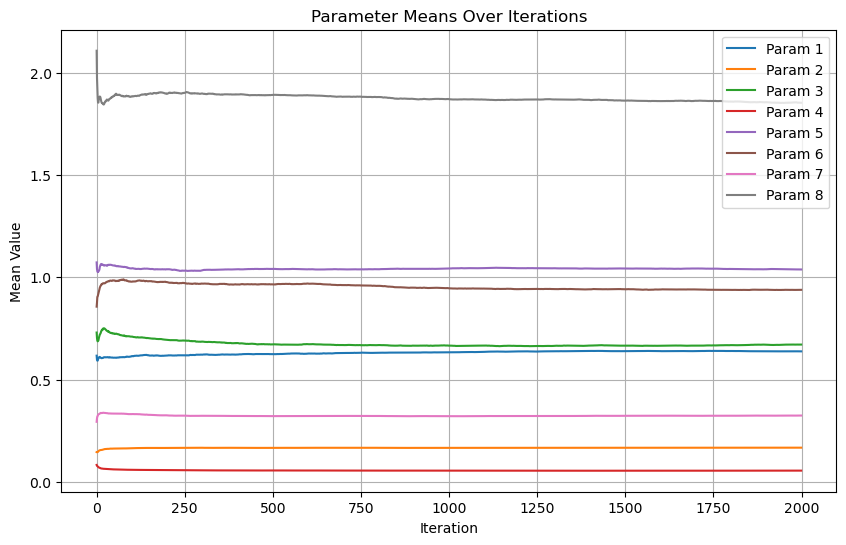

In [30]:
# 初始化结果矩阵 (n, k)
np.random.seed(40) 
l = 8               # 需要同化的参数个数 8 个湍流参数
variable_num = 1    # 监测点变量个数 t
points_num = 10     # 监测点数量
N = 100             # 样本数量
m = variable_num * points_num # 监测点数量 t1 t2 …… t10
samples_data = np.loadtxt("./samples.txt", skiprows=1)
#probes_file = "probes"
probes_file = "probes_2"

# 初始化X_f 预测状态矩阵 m+l x N
X_f = init_X_f(m, l, N, points_num, samples_data, probes_file)

noise_t0 = 0.001
noise_t1 = 0.001
noise_t2 = 0.001
noise_t3 = 0.0001
noise_t4 = 0.0001
noise_t5 = 0.0001
noise_t6 = 0.0001
noise_t7 = 0.0001
noise_t8 = 0.0001
noise_t9 = 0.0001

# 观测矩阵
H = np.eye(m, m+l)

# 读取实验数据
df = pd.read_csv(f'./{probes_file}/yita-monitor-points-Exp.csv', header=None)  
y_exp = df.values.flatten()
#y_exp = np.concatenate([y_t]) # (m,)

iteration = 2000
np.set_printoptions(precision=2,suppress=True, formatter={})
X_f_history = []

for iter in range(iteration):

    noise_std = np.array([noise_t0, noise_t1, noise_t2, noise_t3, noise_t4, noise_t5, noise_t6, noise_t7, noise_t8, noise_t9])
    phi = np.random.normal(loc=0.0, scale=noise_std[:, None], size=(m, N))

    # R = np.cov(phi, bias=False)
    R = np.diag([noise_t0**2, noise_t1**2, noise_t2**2, noise_t3**2, noise_t4**2, noise_t5**2, noise_t6**2, noise_t7**2, noise_t8**2, noise_t9**2])

    # 协方差和 Kalman 增益
    P_f = np.cov(X_f, bias=False)
    K = P_f @ H.T @ np.linalg.inv(H @ P_f @ H.T + R)
    # 状态更新
    for i in range(N):
        X_f[:, i] = X_f[:, i] + K @ (y_exp + phi[:, i] - H @ X_f[:, i])

    X_f_history.append(X_f.copy())
    # 输出监控
    if iter%200 == 0:
        row_means = np.mean(X_f, axis=1)
        points_result = row_means[: m]-y_exp
        print("iteration:", iter, "mean:", row_means[-8:], "points_result:", points_result)

plot_parameters_only(X_f_history,  points_num)

In [31]:
A1 = 0.31
BetaStar = 0.09

k_Schmidt_1 = 1.0
w_Beta_1 = 0.0828
w_Schmidt_1 = 1.0

k_Schmidt_2 = 0.85
w_Beta_2 = 0.075
w_Schmidt_2 = 0.5

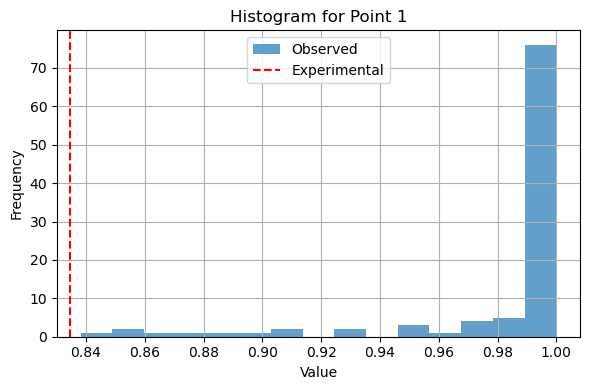

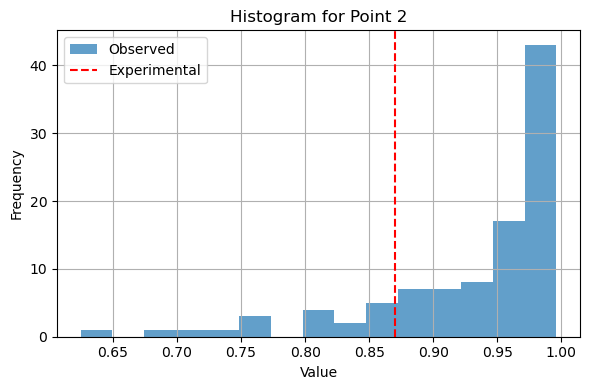

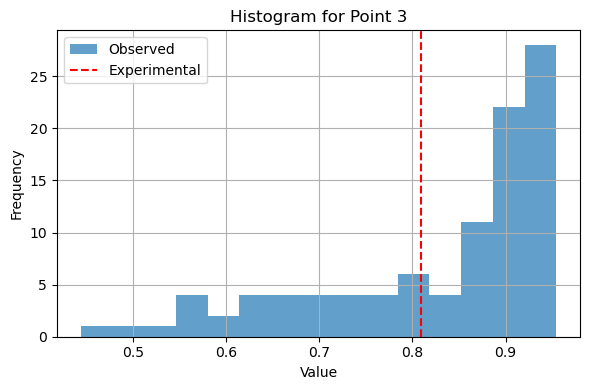

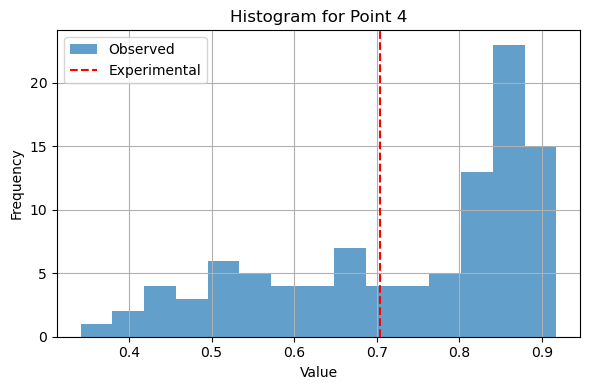

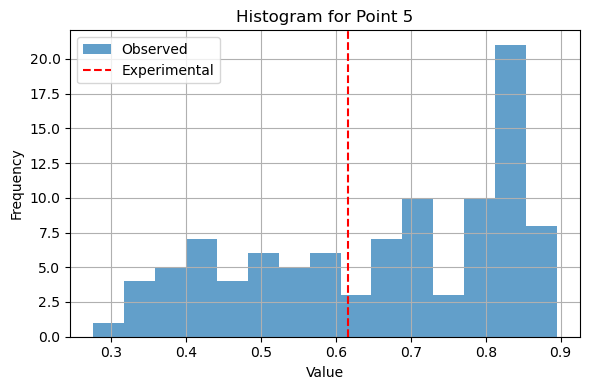

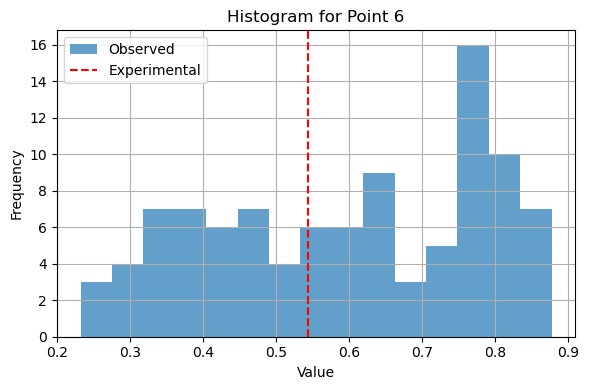

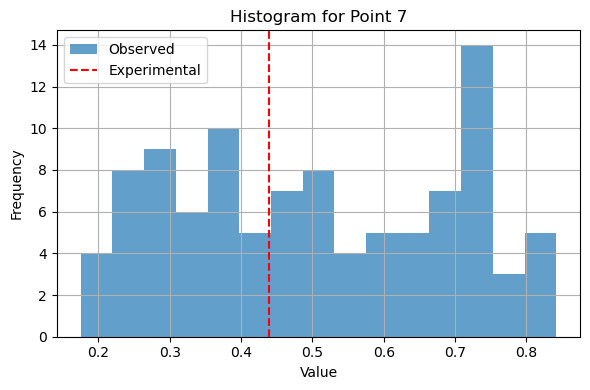

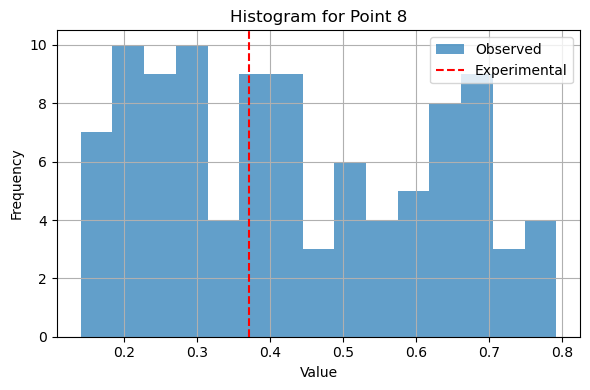

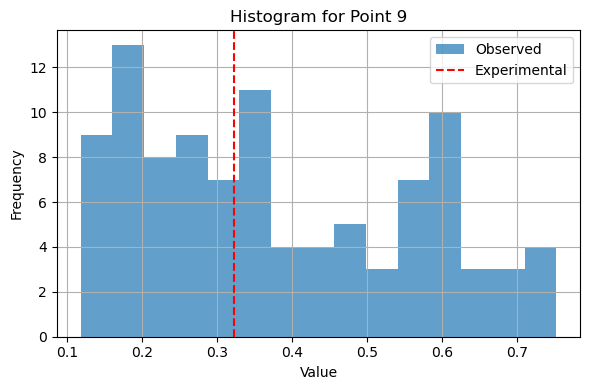

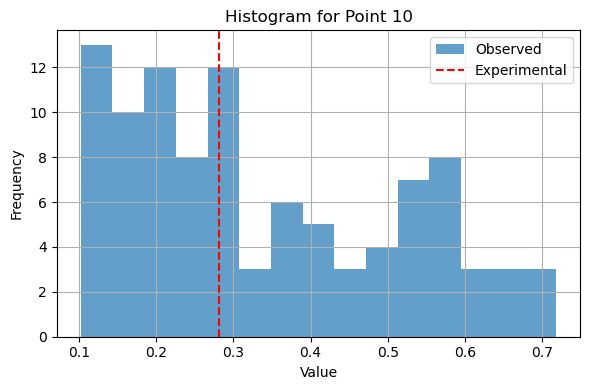

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# 样本数量
N = 100

# 读取观测数据
t_observed = np.zeros((N, 10))
for case_i in range(N):
    df = pd.read_csv(f'./{probes_file}/yita-monitor-points-{case_i:02d}.csv', header=None)
    t_observed[case_i, :] = df.values.flatten()

# 读取实验数据
df = pd.read_csv(f'./{probes_file}/yita-monitor-points-Exp.csv', header=None)
y_t = df.values.flatten()  # 注意加括号调用tolist()

# 画直方图
for i in range(10):
    plt.figure(figsize=(6, 4))
    plt.hist(t_observed[:, i], bins=15, alpha=0.7, label='Observed')
    plt.axvline(y_t[i], color='red', linestyle='--', label='Experimental')
    plt.title(f'Histogram for Point {i+1}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    # 保存图像
    save_path = os.path.join("./figures", f'hist_point_{i+1}.png')
    plt.savefig(save_path, dpi=300)
    plt.close()  # 关闭当前图，节省内存


In [33]:
0.385727
0.394337
0.354601
0.311747
0.279287
0.256868
0.220727
0.192382
0.162326642
0.137547237

0.137547237